In [0]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#data, output = load_breast_cancer(return_X_y = True)
data = load_breast_cancer()

x_train = data['data']
y_train = data['target']

Luego de abrir el conjunto de datos, se procede a realizar un pequeño estudio de ellos y a tratarlos para un posterior uso de ellos en el entrenamiento de distintos modelos. 

Lo primero que hay que notar es que poseemos 569 datos a partir de 30 parámetros distintos. En base a ello, sería bueno buscar alguna manera de reducir dicha cantidad de parámetros con el objetivo de disminuir el 'ruido' que ellos pueden provocar a la máquina al momento de predecir. Pero como el objetivo es familiarizarse con los algoritmos, dejaremos dicho proceso para futuras tareas.

Si bien lo anteriormente dicho se omitió, lo que sí vale la pena notar es que los datos de salida tienen una tendencia mayor a la salida 1 que la salida 0, por lo tanto, al momento de entrenar el modelo, es tentador pensar que él se va a 'familiarizar' más con las salidas 1. Esto será expuesto más adelante con el accuracy del modelo.

In [100]:
x_train.shape

(569, 30)

Text(0.2, 212, '212')

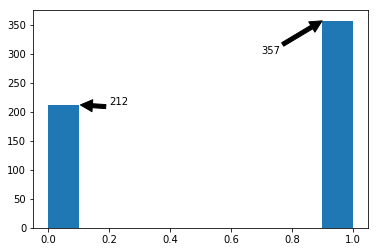

In [101]:
plt.hist(y_train)
plt.annotate('357' , xy = (0.9,357), xytext = (0.7, 300), arrowprops=dict(facecolor='black', shrink=0.005))
plt.annotate('212', xy=(0.1, 212), xytext = (0.2, 212), arrowprops=dict(facecolor='black', shrink=0.05))

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dummy_list = []
aux = list(x_train)
for k in range(x_train.shape[0]):
  aux1= list(aux[k])
  dummy_list = dummy_list + [1] + aux1
eso = np.array(dummy_list)
x_train = eso.reshape(x_train.shape[0],31)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.1, stratify = y_train)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



Decidimos añadir el *bias* al vector para simplificar las operaciones matriciales.
Una vez realizado lo anterior, procedemos a escalar los datos debido a que las unidades y medidas de ellos diferían demasiado, lo que puede alterar los resultados al momento de entrenar la máquina.

Por último, se decidió **dividir** los datos para tener una mejor precisión al momento de medir el *accuracy* de los modelos, utilizando un 10% en datos de testeo.

En lo que sigue, definimos la función *perceptrón* y, posterior a ello, aplicamos el algoritmo de entrenamiento a los datos escalados.


Para cada modelo se eligió el vector de unos de tal manera que todos los modelos tengan el mismo punto de partida. La discución de cada modelos se hará al final de la tarea con el objetivo de poder compararlos.

#PERCEPTRÓN

In [0]:
#Definiendo el perceptrón
import time


def perceptron(X,w):
  aux = np.inner(X,w)
  b= aux >0
  y = b*1
  return(y)


Tiempo de ejecución=  0.20038270950317383
0.9649122807017544


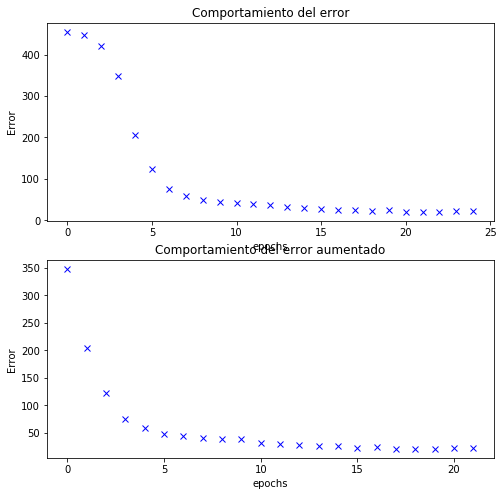

In [104]:
#Entrenando el perceptrón

w_ini = np.ones(31)
alpha = 0.001
iteraciones = 25
error = []

start1 = time.time()
for i in range(iteraciones):
  error = error + [sum(abs(perceptron(x_train, w_ini)-y_train))]
  for k in range(x_train.shape[0]):
    if (perceptron(x_train[k],w_ini) == 0) & (y_train[k]==1):
      w_ini = w_ini + alpha*x_train[k]
    if (perceptron(x_train[k],w_ini)== 1) & (y_train[k]==0):
      w_ini = w_ini - alpha*x_train[k]
pesos_perc = w_ini
end1 = time.time()
print('Tiempo de ejecución= ', end1 - start1)
plt.figure(figsize = (8,8))
plt.subplot(2,1,1)
plt.plot(error, 'bx')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.title('Comportamiento del error')


plt.subplot(2,1,2)
plt.plot(error[3:], 'bx')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.title('Comportamiento del error aumentado')

pred = perceptron(x_test, w_ini)
dic = { 'pred': pred, 'real': y_test}

np.nonzero(pred - y_test)

y_pred = perceptron(x_test,w_ini)
print(accuracy_score(y_pred,y_test))

#FORGETRÓN

In [105]:
11%10

1

In [0]:
#Forgetron
y_dummy = (y_train ==0)*1
y_forgetron = y_train - y_dummy
phi = 0.1
budget = 10
I = set()
sigma = np.zeros(x_train.shape[0]+1)
def forgetron(x,y):
  kernel = np.inner(x_train,x)
  f=0
  B=10
  sigma[0]=phi
  for k in range(x_train.shape[0]+1):
    if ((perceptron(x_train[k-1],np.ones(31)) == 1) & (y_train[k-1]==1)) | ((perceptron(x_train[k-1],np.ones(31))==0) & (y_train[k-1]==0)):
      continue  
    else:
      I.add(k)
      sigma[k] = sigma[k-1]*phi
      if len(I)==B:
        I.remove(min(I))
  for i in I:
    f = sigma[i]*y[i]*np.inner(x_train[i],x[i]) + f
  return f
  

#forgetron(x_train,np.ones(31),y_train)

#Parte continua

In [0]:
def sigmoid(x):
  return(1/(1+np.exp(-x)))

def loss(x,y):
  return(-y*np.log(x) - (1-y)*np.log(1-x))

def gradiente(x,w,y):
  return ((sigmoid(np.inner(x,w))-y)*x)

In [0]:
#el objetvio es minimizar la función loss, por lo tanto para entrenar el modelo debemos ir actualizando los pesos.
import time

alpha = 0.001
w_ini = np.ones(31)
cont =0

iteraciones = 25

def sig_training(xb_train, y_train, w_ini,iteraciones, alpha):
  start = time.time()
  train=[]
  for itera in range(iteraciones):
    cont=0
    train = train + [sum(loss(sigmoid(np.inner(xb_train,w_ini)),y_train))]
    #print(loss(sigmoid(np.inner(xb_train,w_ini)),y_train))
    for k in xb_train:
      pesos = w_ini - alpha*gradiente(k,w_ini, y_train[cont])
      w_ini = pesos
      cont = cont+1
  end = time.time()
  print('Tiempo de ejecución= ', end - start)
  return train, w_ini

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


Tiempo de ejecución=  0.16371726989746094
0.9824561403508771


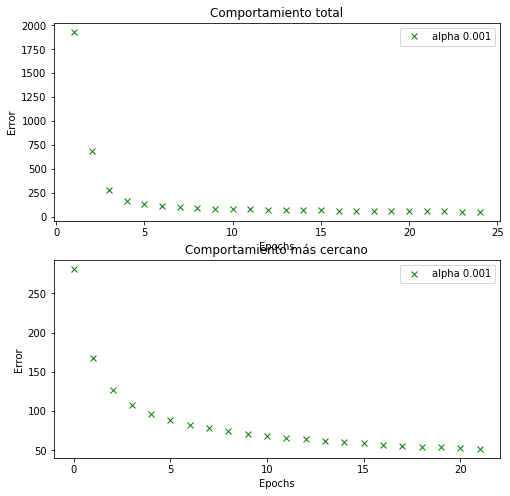

In [109]:
valores, pesos = sig_training(x_train,y_train,np.random.rand(31), 25, 0.001)

plt.figure(figsize = (8,8))
plt.subplot(2,1,1)
plt.plot(valores, 'gx')
plt.legend(['alpha 0.001'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Comportamiento total')

plt.subplot(2,1,2)
plt.plot(valores[3:],'gx')
plt.legend(['alpha 0.001'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Comportamiento más cercano')
y_pred = (sigmoid(np.inner(x_test,pesos)) > 0.5)*1
y_tr = (sigmoid(np.inner(x_train,pesos))>0.5)*1

print(accuracy_score(y_pred, y_test))

#Comparación de resultados

Como se puede apreciar en los códigos anteriores, se entrenó cada modelo con 25 epochs. Es claro, por cómo se eligieron las funciones loss, que la del modelo continuo tendría más problemas al principio. Pero rápidamente, *binary cross entropy* llegó cerca de su mínimo sobrepasando en un momento a la del modelo de perceptrón. Esto es de esperar ya que binary cross entropy fue minimizada a partir de un gradiente exponencial, por lo tanto 'converge' más rápido que la del modelo lineal. 

Text(0.5, 1.0, 'Comparación de los últimos datos de las pérdida para una mejor apreciación')

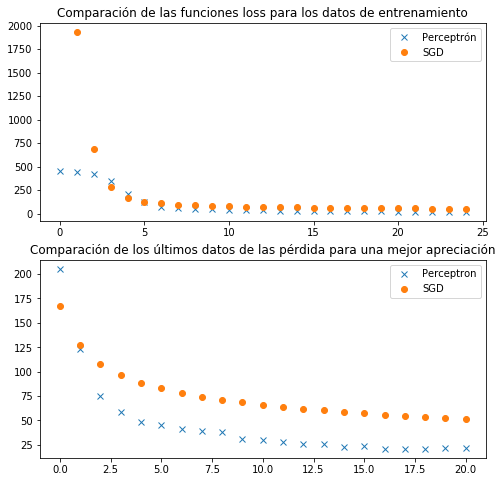

In [110]:
plt.figure(figsize = (8,8))
plt.subplot(2,1,1)
plt.plot(error, 'x')
plt.plot(valores, 'o')
plt.legend(['Perceptrón', 'SGD'])
plt.title('Comparación de las funciones loss para los datos de entrenamiento')


plt.subplot(2,1,2)
plt.plot(error[4:], 'x')
plt.plot(valores[4:], 'o')
plt.legend(['Perceptron', 'SGD'])
plt.title('Comparación de los últimos datos de las pérdida para una mejor apreciación')

Haciendo hincapié al desempeño de los modelos, se puede apreciar que ambos modelos se comportan de manera similar al momento de predecir. Donde el modelo SGD logró acertar a todos los elementos que tenían salida 1 (al principio se mencionó que los datos tenían una tendencia a esta salida), mientras que el modelo perceptrón falló en algunos. Pero en general lo que más vale destacar es el punto anterior y es de lo rápido que se logra entrenar el modelo continuo utilizando SGD. 

En general es dificil hacer una relación a partir de las funciones de pérdida, ya que por un lado estamos ultilizando la función indicatriz para calcular los aciertos del perceptrón, mientras que en otro caso estamos utilizando un modelo continuo que se basa en una penalización más suave. Por lo tanto los cambios no son tan bruscos y los errores marcados difieren en interpretación.

Es por eso que estudió el f1 score, más sus respectivos *recall* y *precision* con el objetivo de ver qué modelo desempeñó de mejor manera los datos.


In [111]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

y_perc_pred = perceptron(x_test,pesos_perc)
y_sgd_pred = (sigmoid(np.inner(x_test,pesos))>0.5)*1


print(classification_report(y_perc_pred, y_test))
print(classification_report(y_sgd_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.97      0.99        37

    accuracy                           0.98        57
   macro avg       0.98      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57



En lo anterior, es posible ver que el modelo SGD, a la larga, tuvo un mejor desempeño del modelo llegando a un accuracy del 98%., mientras que el modelo del perceptrón logró un 96%.

En general ambos modelos supiero desempeñarse bien, mas es importante destacar que, en base al gráfico que  compara las funciones de pérdida, el algoritmo SGD alcanza 'casi' su mínimo en la tercera epoch, por lo tanto es un algoritmo que entrena más rápido que el mostrado por el perceptrón. Más aún, logramos ver que por las tablas anteriores, que el algoritmo SGD superó en todos los aspectos al del perceptrón.